In [341]:
import scipy
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn
import torch.optim as Adam
from sklearn.preprocessing import MaxAbsScaler

digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
X = X /16
x_train, x_test,y_train, y_test = sklearn.model_selection.train_test_split(X, y, 
                                    test_size = .2, random_state = 47)

In [335]:
peekX = 10
peekY = 10
dim = 200
dim = max(dim, peekX*peekY)
Nepochs = 1000
batch_size = 100
epsmax = .04
idim = np.shape(X[0])[0]
odim = 10
datx = 8
daty = 8
p = 3
k = 7
delta = .4
n = 4.5
R=1
train_size = np.shape(x_train)[0]
test_size = np.shape(x_test)[0]

In [312]:
def look(X):
    plt.gray()
    plt.matshow(np.asmatrix(np.reshape(X, (8,8))))
    plt.show()
#look(X[0])

In [336]:
def peek_weights(datx, daty, peekX, peekY, weights):
    fig=plt.figure(figsize=(12.9,10))
    fulmat = np.zeros((datx*peekX,daty*peekY))
    for i in range(peekX):
        for j in range(peekY):
            fulmat[i*datx:i*datx+datx,j*daty:j*daty+daty] = np.reshape(weights[peekY*i+j], (datx,daty))
    im = plt.imshow(fulmat, cmap = 'bwr')
    fig.colorbar(im,ticks=[np.amin(fulmat), 0, np.amax(fulmat)])
    plt.axis('off')
    return

def vec_prod(a, b, w, p):
    return np.transpose(np.matmul(x_batch, np.transpose(weights*weights)))

In [338]:
def unsuperv_fast():
    weights = np.random.normal(0, 1, (dim, idim))
    for epochs in range(Nepochs):
        eps = epsmax*(Nepochs-epochs)/Nepochs
        x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state = 47)
        for i in range (train_size//batch_size):
            x_batch = x_train[batch_size*i:batch_size*(i+1),:]
            inp_lay = vec_prod(x_batch, weights, weights, p)
            #Fast implementation
            args = np.argsort(inp_lay, axis = 1)
            gfunc = np.zeros((dim, batch_size))
            gfunc[argkey[idim-1,:], np.arange(batch_size)]=1
            gfunc[argkey[idim-1-k,:], np.arange(batch_size)]= -1*delta
            gim = np.sum(np.multiply(gfunc,inp_lay), axis = 1)
            
            v = R**p*np.matmul(gfunc, x_batch)-np.multiply(np.outer(gim, np.ones(idim)), weights)
            trans = sklearn.preprocessing.MaxAbsScaler(max_abs = eps)
            trans.fit(v)
            weights += eps*trans.transform(v)
    return weights   

In [ ]:
def supervised_learn(weights):
    finlay = np.random.normal((dim, odim))
    for epochs in range(Nepochs):
    
    x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state = 47)
    for i in range (train_size//batch_size):
        x_batch = x_train[batch_size*i:batch_size*(i+1),:]
        inp_lay = vec_prod(x_batch, weights, weights, p)

(-0.5, 79.5, 79.5, -0.5)

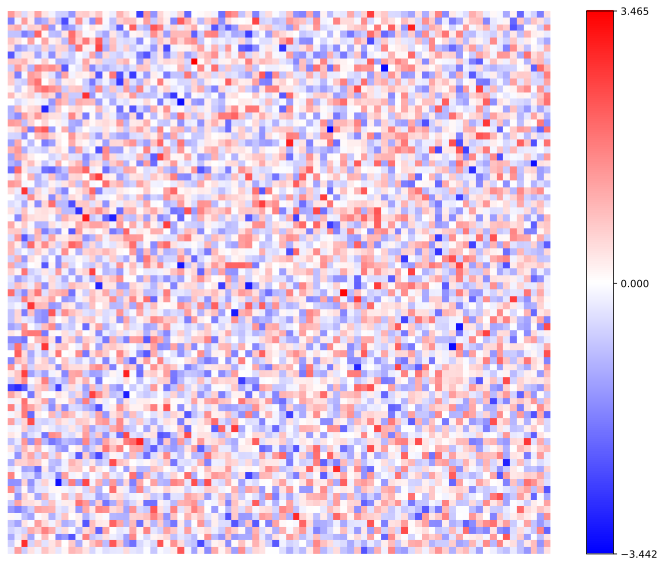